In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1]:
from IPython.display import display, HTML
css = !wget https://raw.githubusercontent.com/lapis-zero09/jupyter_notebook_tips/master/css/jupyter_notebook/monokai.css -q -O -
css = "\n".join(css)
display(HTML('<style type="text/css">%s</style>'%css))

# human area

In [7]:
root_humen_dirc = "/Users/sakka/cnn_anomaly_detection/data/human_area/20170416/"
remove_last_frame = 120 # company logo
human_lst = []
current_frame = 0
time2frame = {}

for i in range(9, 17):
    tmp_human_lst = list(np.loadtxt(root_humen_dirc+"human_{}.csv".format(i), delimiter=","))
    tmp_human_lst = tmp_human_lst[:-remove_last_frame]
    human_lst.extend(tmp_human_lst)
    current_frame += len(tmp_human_lst)
    time2frame[i] = current_frame
    
# completion
for i in range(1, len(human_lst)):
    if human_lst[i] > 0.95:
        human_lst[i] = human_lst[i-1]
    
    
print("Nunber of data: {}".format(len(human_lst)))
print("Data example: {}".format(human_lst[:10]))
print("Max: {}, Min: {}".format(max(human_lst), min(human_lst)))

Nunber of data: 862501
Data example: [0.000136085, 0.000136085, 0.000136085, 0.000120965, 0.000120965, 0.000151206, 0.000151206, 0.000151206, 0.000151206, 0.000151206]
Max: 0.444152, Min: 0.0


In [3]:
time2frame

{9: 107820,
 10: 215610,
 11: 323428,
 12: 431260,
 13: 539076,
 14: 646866,
 15: 754686,
 16: 862506}

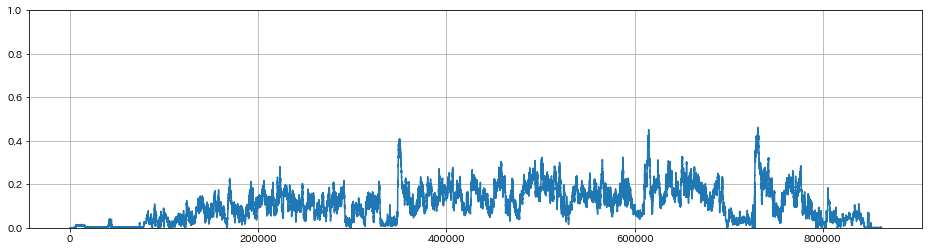

In [4]:
plt.figure(figsize=(16, 4))
plt.plot(human_lst)
plt.ylim(0, 1)
plt.grid()

In [5]:
# normalize by 1sec (30 frame)
human_arr = np.array(human_lst)
for i in range(0, len(human_lst), 30):
    human_arr[i:i+30] = human_arr[i]
    
print("Nunber of data: {}".format(len(human_arr)))
print("Data example: {}".format(human_arr[:10]))
print("Max: {}, Min: {}".format(max(human_arr), min(human_arr)))

Nunber of data: 862506
Data example: [3.02412e-05 3.02412e-05 3.02412e-05 3.02412e-05 3.02412e-05 3.02412e-05
 3.02412e-05 3.02412e-05 3.02412e-05 3.02412e-05]
Max: 0.461707, Min: 0.0


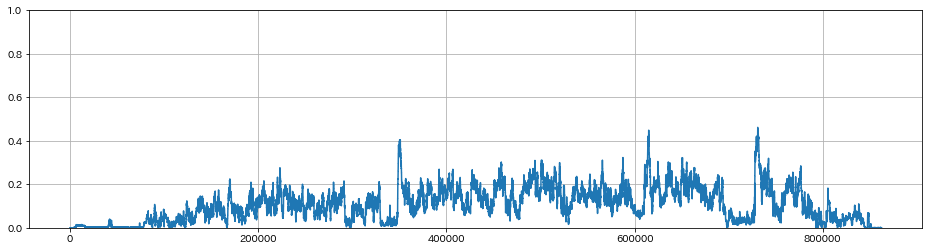

In [6]:
plt.figure(figsize=(16, 4))
plt.plot(human_arr)
plt.ylim(0, 1)
plt.grid()

# grid count

In [3]:
root_grid_dirc = "/Users/sakka/cnn_anomaly_detection/data/grid_ratio/20181030/"

grid_dict_lst = {"grid_0_0":[], "grid_0_1":[], "grid_0_2":[], "grid_0_3":[], "grid_0_4":[], "grid_0_5":[], "grid_0_6":[], "grid_0_7":[]}

for time_idx in range(9, 17):
    tmp_grid_df = pd.read_csv(root_grid_dirc + "{}.csv".format(time_idx))
    for grid_idx in range(8):
        grid_dict_lst["grid_0_{}".format(grid_idx)].extend(list(tmp_grid_df["grid_0_{}".format(grid_idx)]))
    
    
print("Grid id: {}".format(grid_dict_lst.keys()))
print("Number of data: {}".format(len(grid_dict_lst["grid_0_0"])))
print("Data example: {}".format(grid_dict_lst["grid_0_0"][:10]))

Grid id: dict_keys(['grid_0_5', 'grid_0_0', 'grid_0_2', 'grid_0_1', 'grid_0_4', 'grid_0_3', 'grid_0_6', 'grid_0_7'])
Number of data: 863640
Data example: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [4]:
grid_0 = np.zeros(28776*30)
grid_1 = np.zeros(28776*30)
grid_2 = np.zeros(28776*30)
grid_3 = np.zeros(28776*30)
grid_4 = np.zeros(28776*30)
grid_5 = np.zeros(28776*30)
grid_6 = np.zeros(28776*30)
grid_7 = np.zeros(28776*30)

for i in range(28776):
        grid_0[i*30:i*30+30] = grid_dict_lst["grid_0_0"][i]
        grid_1[i*30:i*30+30] = grid_dict_lst["grid_0_1"][i]
        grid_2[i*30:i*30+30] = grid_dict_lst["grid_0_2"][i]
        grid_3[i*30:i*30+30] = grid_dict_lst["grid_0_3"][i]
        grid_4[i*30:i*30+30] = grid_dict_lst["grid_0_4"][i]
        grid_5[i*30:i*30+30] = grid_dict_lst["grid_0_5"][i]
        grid_6[i*30:i*30+30] = grid_dict_lst["grid_0_6"][i]
        grid_7[i*30:i*30+30] = grid_dict_lst["grid_0_7"][i]

(0, 1)

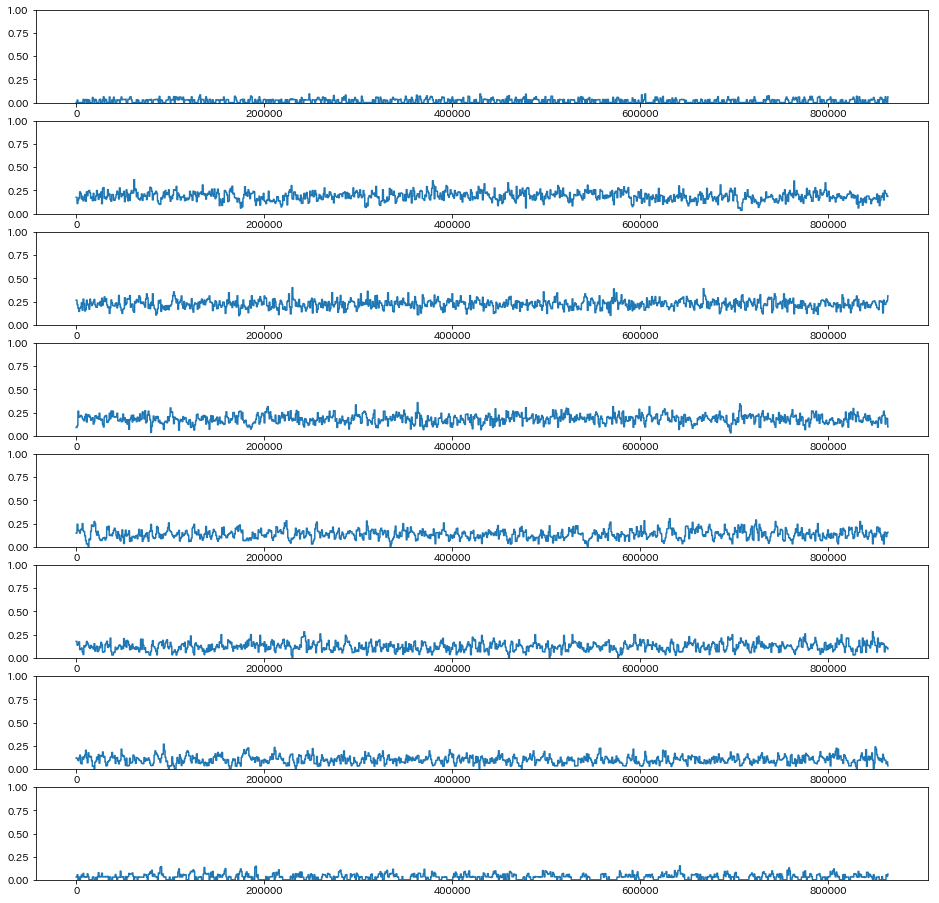

In [5]:
plt.figure(figsize=(16, 16))

plt.subplot(8,1,1)
plt.plot(grid_0)
plt.ylim(0,1)

plt.subplot(8,1,2)
plt.plot(grid_1)
plt.ylim(0,1)

plt.subplot(8,1,3)
plt.plot(grid_2)
plt.ylim(0,1)

plt.subplot(8,1,4)
plt.plot(grid_3)
plt.ylim(0,1)

plt.subplot(8,1,5)
plt.plot(grid_4)
plt.ylim(0,1)

plt.subplot(8,1,6)
plt.plot(grid_5)
plt.ylim(0,1)

plt.subplot(8,1,7)
plt.plot(grid_6)
plt.ylim(0,1)

plt.subplot(8,1,8)
plt.plot(grid_7)
plt.ylim(0,1)

# mean, val, max

In [2]:
root_speed_dirc = "/Users/sakka/cnn_anomaly_detection/data/statistics/20181030/"
remove_last_frame = 120 # company logo

mean_lst = []
val_lst = []
max_lst = []
thresh_lst = []

for i in range(9, 17):
    tmp_mean_lst = list(pd.read_csv(root_speed_dirc+"{}/mean.csv".format(i))["mean"])
    tmp_val_lst = list(pd.read_csv(root_speed_dirc+"{}/var.csv".format(i))["var"])
    tmp_max_lst = list(pd.read_csv(root_speed_dirc+"{}/max.csv".format(i))["max"])
    tmp_thresh_lst = list(pd.read_csv(root_speed_dirc+"{}/acc_thresh.csv".format(i))["acc_thresh"])
    
    tmp_mean_lst = tmp_mean_lst[:-remove_last_frame]
    tmp_val_lst = tmp_val_lst[:-remove_last_frame]
    tmp_max_lst = tmp_max_lst[:-remove_last_frame]
    tmp_thresh_lst = tmp_thresh_lst[:-remove_last_frame]
    
    mean_lst.extend(tmp_mean_lst)
    val_lst.extend(tmp_val_lst)
    max_lst.extend(tmp_max_lst)
    thresh_lst.extend(tmp_thresh_lst)
    
mean_arr = np.array(mean_lst)
val_arr = np.array(val_lst)
max_arr = np.array(max_lst)
thresh_arr = np.array(thresh_lst)
for i in range(0, len(mean_lst), 30):
    mean_arr[i:i+30] = mean_arr[i]
    val_arr[i:i+30] = val_arr[i]
    max_arr[i:i+30] = max_arr[i]
    thresh_arr[i:i+30] = thresh_arr[i]
    
mean_lst = list(mean_arr)
val_lst = list(val_arr)
max_lst = list(max_arr)
thresh_lst = list(thresh_arr)
    
print("******************* MEAN ***************************")
print("Nunber of data: {}".format(len(mean_lst)))
print("Data example: {}".format(mean_lst[:10]))
print("Max: {}, Min: {}".format(max(mean_lst), min(mean_lst)))
print("****************************************************")

print("******************* VAR ***************************")
print("Nunber of data: {}".format(len(val_lst)))
print("Data example: {}".format(val_lst[:10]))
print("Max: {}, Min: {}".format(max(val_lst), min(val_lst)))
print("****************************************************")

print("******************* MAX ***************************")
print("Nunber of data: {}".format(len(max_lst)))
print("Data example: {}".format(max_lst[:10]))
print("Max: {}, Min: {}".format(max(max_lst), min(max_lst)))
print("****************************************************")

print("******************* THRESH ***************************")
print("Nunber of data: {}".format(len(thresh_lst)))
print("Data example: {}".format(thresh_lst[:10]))
print("Max: {}, Min: {}".format(max(thresh_lst), min(max_lst)))
print("****************************************************")

******************* MEAN ***************************
Nunber of data: 861780
Data example: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max: 144.52100000000002, Min: 0.0
****************************************************
******************* VAR ***************************
Nunber of data: 861780
Data example: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max: 982.573, Min: 0.0
****************************************************
******************* MAX ***************************
Nunber of data: 861780
Data example: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max: 424.06300000000005, Min: 0.0
****************************************************
******************* THRESH ***************************
Nunber of data: 861780
Data example: [150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0, 150.0]
Max: 234.54426085333333, Min: 0.0
****************************************************


In [3]:
label_arr =np.zeros(max_arr.shape) 
label_arr[max_arr > thresh_arr] = 1

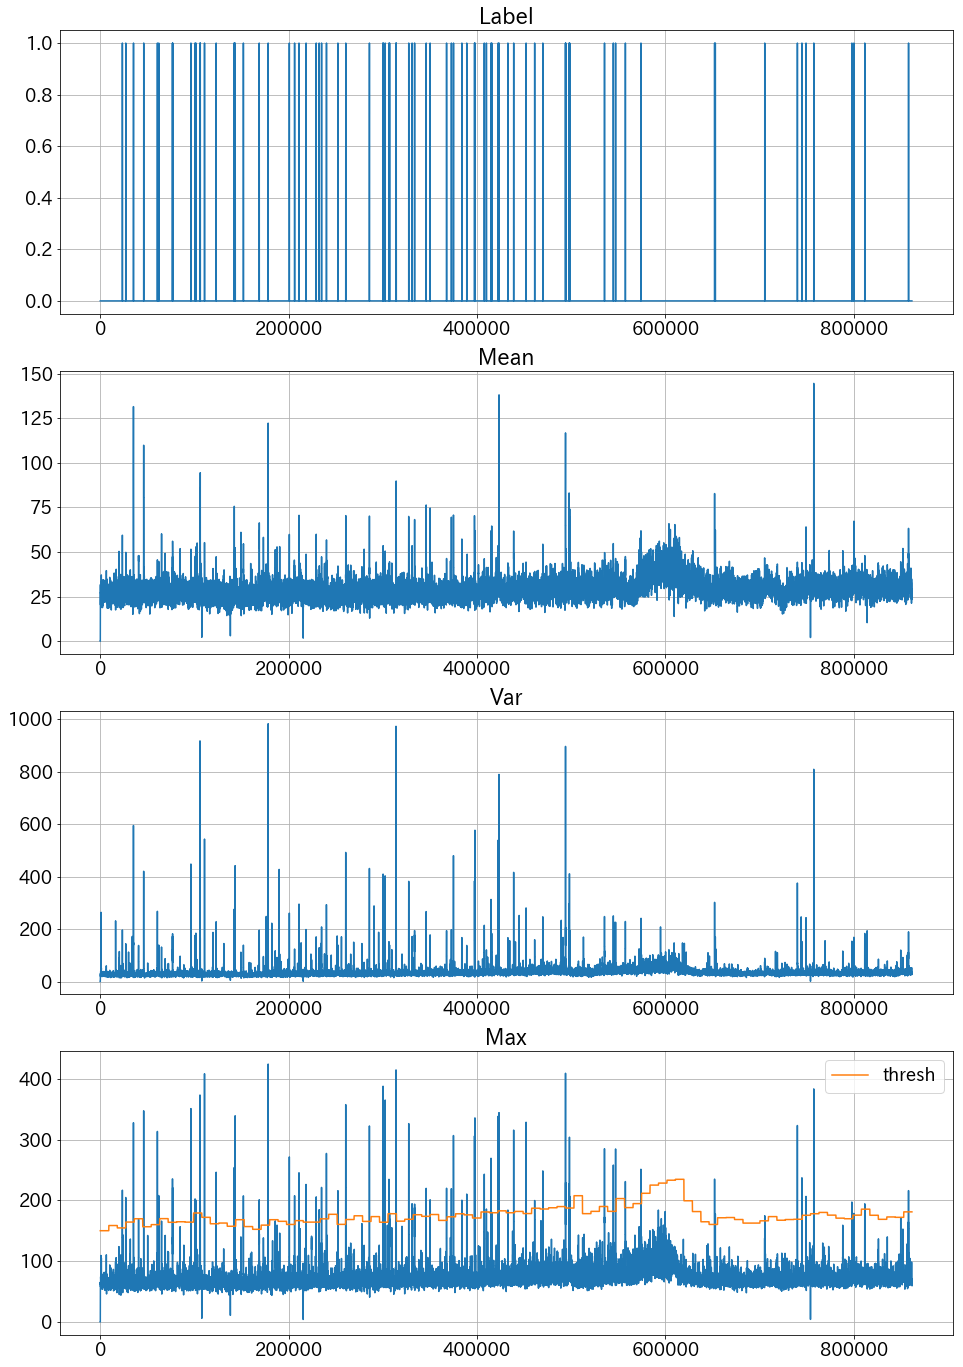

In [4]:
plt.figure(figsize=(16, 24))
plt.rcParams["font.size"] = 18

plt.subplot(4, 1, 1)
plt.title("Label")
plt.plot(label_arr)
plt.grid()

plt.subplot(4, 1, 2)
plt.title("Mean")
plt.plot(mean_lst)
plt.grid()

plt.subplot(4, 1, 3)
plt.title("Var")
plt.plot(val_lst)
plt.grid()

plt.subplot(4, 1, 4)
plt.title("Max")
plt.plot(max_lst)
plt.plot(thresh_lst, label="thresh")
plt.legend()
plt.grid()


plt.savefig("./tmp.png")

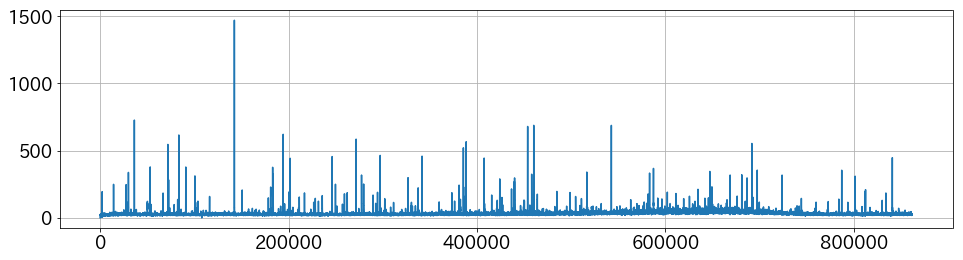

In [10]:
plt.figure(figsize=(16, 4))
plt.plot(val_lst)
plt.grid()

In [11]:
human_arr = np.array(human_lst[:862520])*400
plt.figure(figsize=(16, 4))
plt.plot(max_lst)
plt.plot(human_arr)
plt.grid()

NameError: name 'human_lst' is not defined

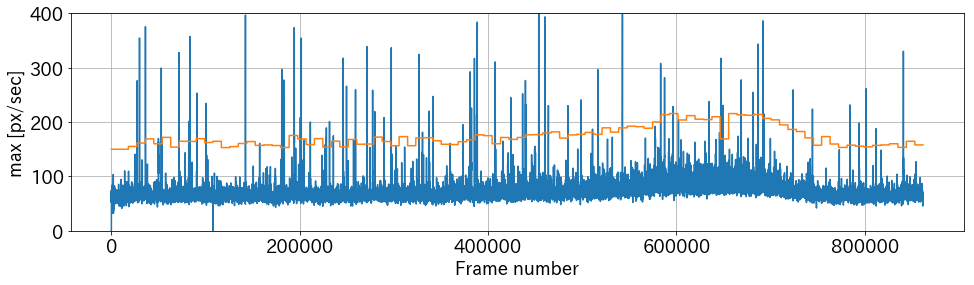

In [12]:
plt.figure(figsize=(16, 4))
plt.plot(max_lst)
plt.plot(thresh_lst)
plt.ylim(0, 400)
plt.rcParams["font.size"] = 18
plt.ylabel("max [px/sec]")
plt.xlabel("Frame number")
plt.grid()

# degree

In [8]:
def check_anormal_degree(deg):
    if (deg>=70) and (deg<=110):
        return 1
    elif (deg>=250) and (deg<=290):
        return 1
    else:
        return 0

In [19]:
import csv

root_degree_dirc = "/Users/sakka/cnn_anomaly_detection/data/statistics/20170421/"
remove_last_frame = 120 # company logo

degree_lst = []


for i in range(9, 17):
    with open(root_degree_dirc+"{}/degree.csv".format(i), "r") as f:
        reader = csv.reader(f)
        for i, row in enumerate(reader):
            if i > remove_last_frame:
                check_lst = []
                for deg in row[:-1]:
                    if deg == "360":
                        pass
                    else:
                        deg = int(int(deg)/10)*10
                        check_lst.append(check_anormal_degree(deg))
                        
                if 1 in check_lst:
                    degree_lst.append(1)
                else:
                    degree_lst.append(0)

In [22]:
len(degree_lst)*30

834240

# feed, diver list

2017/04/16  



feed time  
14:38-14:41

In [11]:
feed_arr = np.zeros(len(mean_lst), dtype="uint8")
diver_arr = np.zeros(len(mean_lst), dtype="uint8")

feed_start = 646891 + 30*60*37
feed_end = feed_start + 30*60*2 + 1

diver_start = 0
diver_end =  0

feed_arr[feed_start:feed_end] = 1
diver_arr[diver_start:diver_end] = 1

feed_lst = list(feed_arr)
diver_lst = list(diver_arr)

assert len(feed_lst) == len(diver_lst)

print("************************ FEDD ******************************")
print("Nunber of data: {}".format(len(feed_lst)))
print("Data example: {}".format(feed_lst[:10]))
print("Max: {}, Min: {}".format(max(feed_lst), min(feed_lst)))
print("*************************************************************")

print("************************ DIVER ******************************")
print("Nunber of data: {}".format(len(diver_lst)))
print("Data example: {}".format(diver_lst[:10]))
print("Max: {}, Min: {}".format(max(diver_lst), min(diver_lst)))
print("*************************************************************")

************************ FEDD ******************************
Nunber of data: 862493
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 1, Min: 0
*************************************************************
************************ DIVER ******************************
Nunber of data: 862493
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 0, Min: 0
*************************************************************


In [12]:
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/feed/20170416/feed.csv", feed_lst, delimiter=",")
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/diver/20170416/diver.csv", diver_lst, delimiter=",")

2017/04/17  
{9: 107820,  
 10: 215637,  
 11: 323440,  
 12: 431256,  
 13: 539076,  
 14: 646891,  
 15: 754711,  
 16: 862531}  
 
 feed time:  
14:37-14:39

In [29]:
feed_arr = np.zeros(len(mean_lst), dtype="uint8")
diver_arr = np.zeros(len(mean_lst), dtype="uint8")

feed_start = 646891 + 30*60*37
feed_end = feed_start + 30*60*2 + 1

diver_start = 0
diver_end =  0

feed_arr[feed_start:feed_end] = 1
diver_arr[diver_start:diver_end] = 1

feed_lst = list(feed_arr)
diver_lst = list(diver_arr)

assert len(feed_lst) == len(diver_lst)

print("************************ FEDD ******************************")
print("Nunber of data: {}".format(len(feed_lst)))
print("Data example: {}".format(feed_lst[:10]))
print("Max: {}, Min: {}".format(max(feed_lst), min(feed_lst)))
print("*************************************************************")

print("************************ DIVER ******************************")
print("Nunber of data: {}".format(len(diver_lst)))
print("Data example: {}".format(diver_lst[:10]))
print("Max: {}, Min: {}".format(max(diver_lst), min(diver_lst)))
print("*************************************************************")

************************ FEDD ******************************
Nunber of data: 862523
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 1, Min: 0
*************************************************************
************************ DIVER ******************************
Nunber of data: 862523
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 0, Min: 0
*************************************************************


In [30]:
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/feed/20170417/feed.csv", feed_lst, delimiter=",")
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/diver/20170417/diver.csv", diver_lst, delimiter=",")

2017/04/18  
{9: 107840,  
 10: 215647,  
 11: 323467,  
 12: 431257,  
 13: 539071,  
 14: 646891,  
 15: 754711,  
 16: 862529}  
 
 feed time  
 14:37-14:40

In [38]:
feed_arr = np.zeros(len(mean_lst), dtype="uint8")
diver_arr = np.zeros(len(mean_lst), dtype="uint8")

feed_start = 646891 + 30*60*37
feed_end = feed_start + 30*60*3 + 1

diver_start = 0
diver_end =  0

feed_arr[feed_start:feed_end] = 1
diver_arr[diver_start:diver_end] = 1

feed_lst = list(feed_arr)
diver_lst = list(diver_arr)

assert len(feed_lst) == len(diver_lst)

print("************************ FEDD ******************************")
print("Nunber of data: {}".format(len(feed_lst)))
print("Data example: {}".format(feed_lst[:10]))
print("Max: {}, Min: {}".format(max(feed_lst), min(feed_lst)))
print("*************************************************************")

print("************************ DIVER ******************************")
print("Nunber of data: {}".format(len(diver_lst)))
print("Data example: {}".format(diver_lst[:10]))
print("Max: {}, Min: {}".format(max(diver_lst), min(diver_lst)))
print("*************************************************************")

************************ FEDD ******************************
Nunber of data: 862521
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 1, Min: 0
*************************************************************
************************ DIVER ******************************
Nunber of data: 862521
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 0, Min: 0
*************************************************************


In [39]:
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/feed/20170418/feed.csv", feed_lst, delimiter=",")
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/diver/20170418/diver.csv", diver_lst, delimiter=",")

2017/04/20  

{9: 107820,  
 10: 215638,  
 11: 323454,  
 12: 431244,  
 13: 539064,  
 14: 646873,  
 15: 754709,  
 16: 862499}  
 
 
 feed time
 14:36-14:38

In [14]:
feed_arr = np.zeros(len(mean_lst), dtype="uint8")
diver_arr = np.zeros(len(mean_lst), dtype="uint8")

feed_start = 646873 + 30*60*36
feed_end = feed_start + 30*60*2 + 1

diver_start = 0
diver_end =  0

feed_arr[feed_start:feed_end] = 1
diver_arr[diver_start:diver_end] = 1

feed_lst = list(feed_arr)
diver_lst = list(diver_arr)

assert len(feed_lst) == len(diver_lst)

print("************************ FEDD ******************************")
print("Nunber of data: {}".format(len(feed_lst)))
print("Data example: {}".format(feed_lst[:10]))
print("Max: {}, Min: {}".format(max(feed_lst), min(feed_lst)))
print("*************************************************************")

print("************************ DIVER ******************************")
print("Nunber of data: {}".format(len(diver_lst)))
print("Data example: {}".format(diver_lst[:10]))
print("Max: {}, Min: {}".format(max(diver_lst), min(diver_lst)))
print("*************************************************************")

************************ FEDD ******************************
Nunber of data: 862491
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 1, Min: 0
*************************************************************
************************ DIVER ******************************
Nunber of data: 862491
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 0, Min: 0
*************************************************************


In [15]:
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/feed/20170420/feed.csv", feed_lst, delimiter=",")
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/diver/20170420/diver.csv", diver_lst, delimiter=",")

In [51]:
# 2017/04/21

feed_arr = np.zeros(len(mean_lst), dtype="uint8")
diver_arr = np.zeros(len(mean_lst), dtype="uint8")

feed_start = 754710 + 30*60*6
feed_end = feed_start + 30*60*4 + 1

diver_start = 107814 + 30*60*22
diver_end = 431274 + 30*60*4 + 1

feed_arr[feed_start:feed_end] = 1
diver_arr[diver_start:diver_end] = 1

feed_lst = list(feed_arr)
diver_lst = list(diver_arr)

assert len(feed_lst) == len(diver_lst)

print("************************ FEDD ******************************")
print("Nunber of data: {}".format(len(feed_lst)))
print("Data example: {}".format(feed_lst[:10]))
print("Max: {}, Min: {}".format(max(feed_lst), min(feed_lst)))
print("*************************************************************")

print("************************ DIVER ******************************")
print("Nunber of data: {}".format(len(diver_lst)))
print("Data example: {}".format(diver_lst[:10]))
print("Max: {}, Min: {}".format(max(diver_lst), min(diver_lst)))
print("*************************************************************")

************************ FEDD ******************************
Nunber of data: 862520
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 1, Min: 0
*************************************************************
************************ DIVER ******************************
Nunber of data: 862520
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 1, Min: 0
*************************************************************


In [52]:
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/feed/20170421/feed.csv", feed_lst, delimiter=",")
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/diver/20170421/diver.csv", diver_lst, delimiter=",")

2017/04/22  
{9: 107820,  
 10: 215610,  
 11: 323428,  
 12: 431260,  
 13: 539076,  
 14: 646866,  
 15: 754686,  
 16: 862506}  


feed time  
14:36-14:40  

In [47]:
feed_arr = np.zeros(len(mean_lst), dtype="uint8")
diver_arr = np.zeros(len(mean_lst), dtype="uint8")

feed_start = 646866 + 30*60*36
feed_end = feed_start + 30*60*4 + 1

diver_start = 0
diver_end =  0

feed_arr[feed_start:feed_end] = 1
diver_arr[diver_start:diver_end] = 1

feed_lst = list(feed_arr)
diver_lst = list(diver_arr)

assert len(feed_lst) == len(diver_lst)

print("************************ FEDD ******************************")
print("Nunber of data: {}".format(len(feed_lst)))
print("Data example: {}".format(feed_lst[:10]))
print("Max: {}, Min: {}".format(max(feed_lst), min(feed_lst)))
print("*************************************************************")

print("************************ DIVER ******************************")
print("Nunber of data: {}".format(len(diver_lst)))
print("Data example: {}".format(diver_lst[:10]))
print("Max: {}, Min: {}".format(max(diver_lst), min(diver_lst)))
print("*************************************************************")

************************ FEDD ******************************
Nunber of data: 862498
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 1, Min: 0
*************************************************************
************************ DIVER ******************************
Nunber of data: 862498
Data example: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Max: 0, Min: 0
*************************************************************


In [48]:
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/feed/20170422/feed.csv", feed_lst, delimiter=",")
np.savetxt("/Users/sakka/cnn_anomaly_detection/data/diver/20170422/diver.csv", diver_lst, delimiter=",")

# Datasets

2017/04/16-2017/04/22  
09:00-17:00  
FPS: 30  

time2frame  
{9: 107814,
 10: 215634,
 11: 323454,
 12: 431274,
 13: 539084,
 14: 646890,
 15: 754710,
 16: 862528}
 
 
  
feed time:  
4/16: 14:38-14:41  
4/17: 14:37-14:39  
4/18: 14:37-14:40  
4/20: 14:26-14:38  
4/21: 15:06-15:10  
4/22: 14:36-14:40  

diver time:  
9:22-12:04  


In [43]:
pred_time = 0

datasets_dictlst = {"mean":[], "val":[], "max":[], "thresh":[],"human":[], \
                    "grid_0":[], "grid_1":[], "grid_2":[], "grid_3":[], "grid_4":[], "grid_5":[], "grid_6":[], "grid_7":[],\
                   "feed":[], "diver":[],"label":[]}

for i in range(0, len(mean_lst)-pred_time, 30):
    datasets_dictlst["mean"].append(mean_lst[i])
    datasets_dictlst["val"].append(val_lst[i])
    datasets_dictlst["max"].append(max_lst[i])
    datasets_dictlst["thresh"].append(thresh_lst[i])
    datasets_dictlst["human"].append(human_lst[i])
    datasets_dictlst["grid_0"].append(grid_0[i])
    datasets_dictlst["grid_1"].append(grid_1[i])
    datasets_dictlst["grid_2"].append(grid_2[i])
    datasets_dictlst["grid_3"].append(grid_3[i])
    datasets_dictlst["grid_4"].append(grid_4[i])
    datasets_dictlst["grid_5"].append(grid_5[i])
    datasets_dictlst["grid_6"].append(grid_6[i])
    datasets_dictlst["grid_7"].append(grid_7[i])
    datasets_dictlst["feed"].append(feed_lst[i])
    datasets_dictlst["diver"].append(diver_lst[i])
    if max_lst[i+pred_time] >= thresh_lst[i+pred_time]:
        datasets_dictlst["label"].append(1)
    else:
        datasets_dictlst["label"].append(0)
        
    
datasets_df = pd.DataFrame(datasets_dictlst)

datasets_df.head()

,diver,feed,grid_0,grid_1,grid_2,grid_3,grid_4,grid_5,grid_6,grid_7,human,label,max,mean,thresh,val
0,0.0,0.0,0.045455,0.136364,0.068182,0.181818,0.204545,0.204545,0.159091,0.0,0.0,0,0.0000,0.0000,151.93054,0.0000
1,0.0,0.0,0.000000,0.171429,0.257143,0.257143,0.171429,0.142857,0.000000,0.0,0.0,0,63.8651,28.7269,151.93054,26.8359
2,0.0,0.0,0.000000,0.161290,0.225806,0.290323,0.161290,0.129032,0.032258,0.0,0.0,0,67.7732,29.2715,151.93054,27.5259
3,0.0,0.0,0.057143,0.114286,0.228571,0.171429,0.228571,0.200000,0.000000,0.0,0.0,0,71.1882,30.5215,151.93054,27.7026
4,0.0,0.0,0.000000,0.235294,0.117647,0.205882,0.294118,0.147059,0.000000,0.0,0.0,0,71.3941,30.1486,151.93054,26.9191


In [44]:
len(datasets_df[datasets_df["label"] == 0])

28661

In [45]:
len(datasets_df[datasets_df["label"] == 1])

90

In [46]:
datasets_df.to_csv("/Users/sakka/cnn_anomaly_detection/data/datasets/time_series_20170421.csv", index=False)

In [53]:
test_df = pd.read_csv("../data/datasets/time_series_20170421.csv")
test_df.head()

,diver,feed,grid_0_0,grid_0_1,grid_0_2,grid_0_3,grid_0_4,grid_0_5,grid_0_6,grid_0_7,human,label,max,mean,thresh,val
0,0,0,0.025641,0.153846,0.153846,0.205128,0.102564,0.179487,0.128205,0.051282,0.0,0,0.0000,0.0000,151.93054,0.0000
1,0,0,0.025641,0.153846,0.153846,0.205128,0.102564,0.179487,0.128205,0.051282,0.0,0,63.8651,28.7269,151.93054,26.8359
2,0,0,0.025641,0.153846,0.153846,0.205128,0.102564,0.179487,0.128205,0.051282,0.0,0,67.7732,29.2715,151.93054,27.5259
3,0,0,0.025641,0.153846,0.153846,0.205128,0.102564,0.179487,0.128205,0.051282,0.0,0,71.1882,30.5215,151.93054,27.7026
4,0,0,0.025641,0.153846,0.153846,0.205128,0.102564,0.179487,0.128205,0.051282,0.0,0,71.3941,30.1486,151.93054,26.9191
